In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

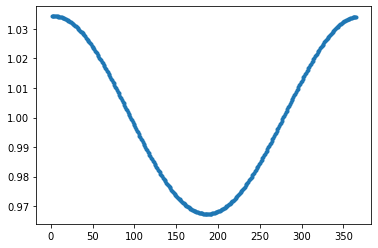

In [2]:
# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

plt.plot(dayOfYear,relPower,'.')

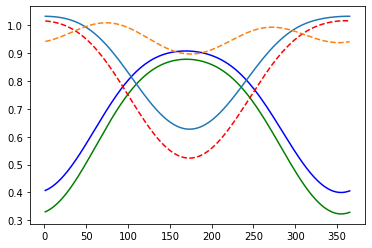

In [3]:
# tilt angle of the earth in 2020
tiltAngle = -23.44*np.pi/180.0

angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))

angleLaCrosse = 43.8138*np.pi/180.0 - angle
angleAugsburg = 48.3705*np.pi/180.0 - angle
angleJohannesburg = -26.2041*np.pi/180.0 - angle
angleSydney = -33.8688*np.pi/180.0 - angle
angleSingapore = 1.3521*np.pi/180.0 - angle


#plt.plot(dayOfYear,angleLaCrosse)
#plt.plot(dayOfYear,angleEquator)

plt.plot(dayOfYear,(np.cos(angleLaCrosse)*relPower),'b')
plt.plot(dayOfYear,(np.cos(angleAugsburg)*relPower),'g')
plt.plot(dayOfYear,(np.cos(angleJohannesburg)*relPower))
plt.plot(dayOfYear,(np.cos(angleSydney)*relPower),'r--')
plt.plot(dayOfYear,(np.cos(angleSingapore)*relPower),'--')


In [4]:
from Sun import Sun

coords = {'longitude': 76.4730, 'latitude': 37.0871}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionNN = dayLength/12.0

coords = {'longitude': 76.4860, 'latitude': 44.2312}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionK = dayLength/12.0

coords = {'longitude': 43.1729, 'latitude': -22.9068}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionRio = dayLength/12.0

coords = {'longitude': 78.1834, 'latitude': 1.8312}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionEQ = dayLength/12.0

plt.plot(dayOfYear,lengthCorrectionNN)
plt.plot(dayOfYear,lengthCorrectionK)
plt.plot(dayOfYear,lengthCorrectionRio)
plt.plot(dayOfYear,lengthCorrectionEQ)

ModuleNotFoundError: ignored

In [5]:
tempLAXTheory = (np.cos(angleLaCrosse)*relPower*np.sqrt(lengthCorrectionLAX))
tempAugsburgTheory = (np.cos(angleAugsburg)*relPower*np.sqrt(lengthCorrectionAugsburg))
tempJohannesburgTheory = (np.cos(angleJohannesburg)*relPower*np.sqrt(lengthCorrectionJohannesburg))
tempSydneyTheory = (np.cos(angleSydney)*relPower*np.sqrt(lengthCorrectionSydney))
tempSingaporeTheory = (np.cos(angleSingapore)*relPower*np.sqrt(lengthCorrectionSingapore))

plt.plot(dayOfYear,tempLAXTheory,'b')
plt.plot(dayOfYear,tempAugsburgTheory,'g')
plt.plot(dayOfYear,tempJohannesburgTheory,'r')
plt.plot(dayOfYear,tempSydneyTheory,'--')
plt.plot(dayOfYear,tempSingaporeTheory,'r--')

NameError: ignored

In [13]:
tempRio = np.array([30,31,30,28,26,25,25,25,26,27,28,29])+273.15
tempEquador = np.array([26,26,26,26,26,25,25,26,27,27,27,27])+273.15
tempKingston = np.array([-3,-1,4,11,18,23,26,25,20,13,7,1])+273.15
tempNN = np.array([10,12,16,21,26,30,32,31,28,22,17,12])+273.15

error = np.array([1 for i in range(12)])

mean = tempLAX.max()
tempJohannesburg=tempJohannesburg/mean
tempSydney=tempSydney/mean
tempAugsburg=tempAugsburg/mean
tempSingapore=tempSingapore/mean
tempLAX = tempLAX/mean
error=error/mean

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

plt.errorbar(month,tempSydney,yerr=error,fmt='mo')
plt.errorbar(month,tempJohannesburg,yerr=error,fmt='ro')
plt.errorbar(month,tempAugsburg,yerr=error,fmt='go')
plt.errorbar(month,tempLAX,yerr=error,fmt='bo')
plt.plot(dayOfYear,(tempNNTheory-1)/8+.995,'b')
plt.plot(dayOfYear,(tempAugsburgTheory-1)/7+.98,'g')
plt.plot(dayOfYear,(tempJohannesburgTheory-1)/25+.99,'r')
plt.plot(dayOfYear,(tempSydneyTheory-1)/25+.98,'m')

NameError: ignored

What are the scale factors and offsets required to give a reasonable fit in each case?
-Have latitudes that are close together.

Locations used:
*   LaCrosse, WI
*   Augsburg, Germany
*   Johannesburg, South Africa
*   Sydney, Australia
*   Singapore



I used theses locations and fixed the code but had trouble getting what I needed beyond the second graph. 

What are the scale factors and offsets required to give a reasonable fit in each case?
-Have latitudes that are close together.

